# The Quantum Fourier Transform

This notebook contains implimentation of QFT in qiskit, for three qubits and then for n qubits. 
Before proceeding further, let's import some functions which we'll need later.

In [9]:
import numpy as np
from numpy import pi
# Importing standard Qiskit libraries

from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.widgets import scalable_circuit

#from qiskit.tools.jupyter import *


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

## 1)  3-qubit QFT

First thing we need to do is to define a three qubit quantum circuit.

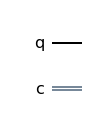

In [14]:
qc = QuantumCircuit(1,1)
qc.draw()

Now lets apply 'H' gate on qubit 2. 
##### Note: The least significant bit in qiskit is q0, and we need to apply H-gate on the most significant bit.

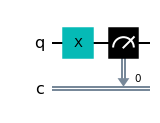

In [15]:
qc.x(0)
qc.measure(0,0)
qc.draw()

Next, we want to rotate it by pi/2, if qubit 1 is in state 1. That means, we want to apply a controlled rotation on q2 with angle pi/2 and q1 as controll.

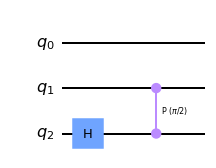

In [5]:
qc.cp(pi/2, 1, 2)
qc.draw()

Another rotation by pi/4, if q0 is 1.

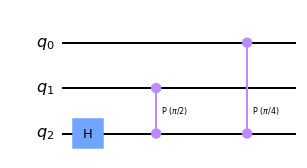

In [6]:
qc.cp(pi/4, 0, 2)
qc.draw()

With that, we are done with qubit q2. Now we ignore it and repeat the process for q1 and q0.

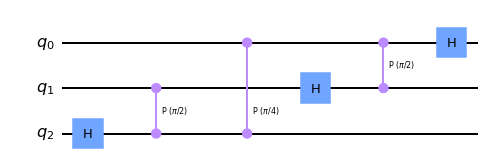

In [7]:
qc.h(1)
qc.cp(pi/2, 0, 1)
qc.h(0)
qc.draw()

Finally we need to reverse the order of the output bits to complete the QFT. In this case, swapping of q0 and q2 will be enough. 

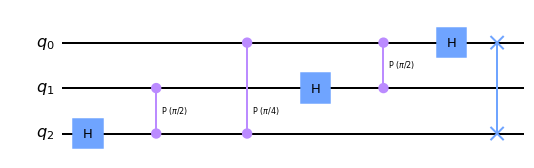

In [8]:
qc.swap(0, 2)
qc.draw()

This is the final circuit of QFT for three qubits.

## 2)  n-qubit QFT

Now that we have done with the 3-qubit QFT, lets deal with n-qubits. We'll define a function whcih apply H-gate on most significant bit and then apply appropriate rotations.

In [11]:
def qbt_rotations(circuit,n):
    if n == 0 :
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qbt_rotations(circuit,n)

Above function apply all hadamard and controlled rotation gates correctlly for a given number of inputs. Now lets define a function which reversed the order of the output qubits.

In [12]:
def swap_qbt(circuit, n):
    t = n//2
    for qubit in range(t):
        circuit.swap(qubit, n-qubit-1)
    return circuit

Now that we have defined both functions, let's combine them into a single one.

In [13]:
def qft(circuit,n):
    qbt_rotations(circuit,n)
    swap_qbt(circuit, n)
    return circuit


Let's draw our circuit for 4 qubits-

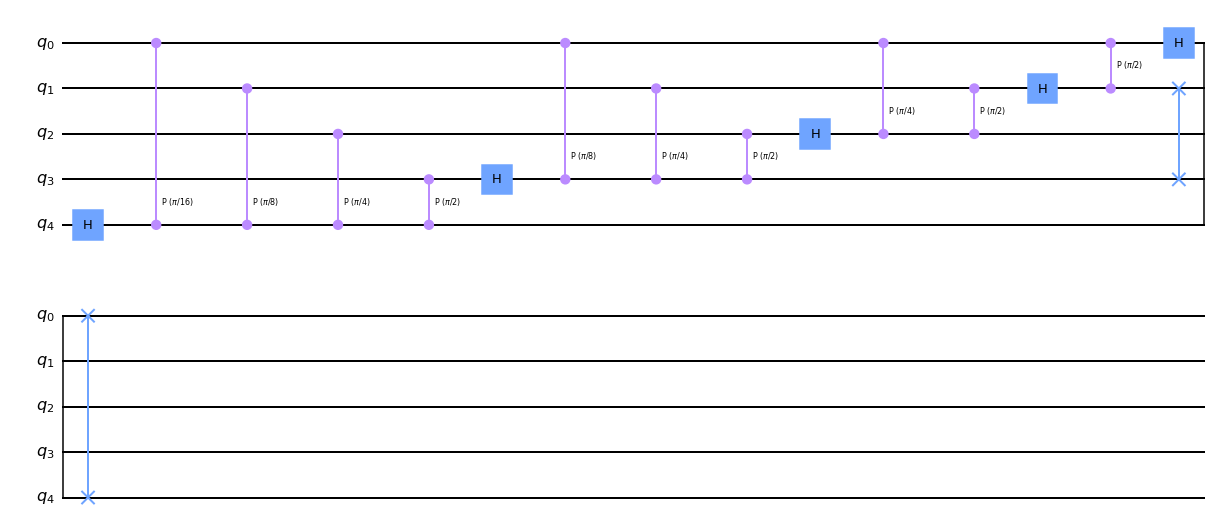

In [14]:
qc = QuantumCircuit(5)
qft(qc, 5)
qc.draw()

A genralised circuit for QFT-

In [27]:
scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04U\x00\x00\x01\x08\x08\x06\x00\x00\x00\x9eK\xcbE\x…

### Let's demonstrate our circuit

To demonstrate this circuit, first consider a computational basis. For this let's encode 10 in 4-qubits (after converting into binary).

In [18]:
bin(0)

'0b0'

10 in binary is written as 1010. Encoding this into four qubits.

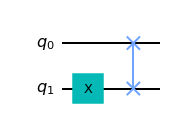

In [34]:
qc2 = QuantumCircuit(2)
qc2.x(1)
qc2.swap(1,0)
qc2.draw()

let's check the qubit's states using the statevector simulator:

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


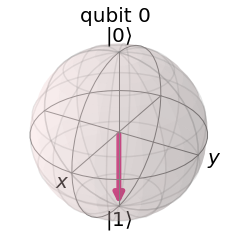

In [6]:
sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

Now applying qft functions on this circuit.

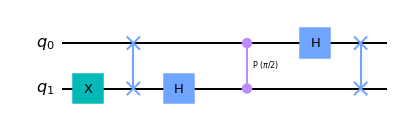

In [36]:
qft(qc2,2)
qc2.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


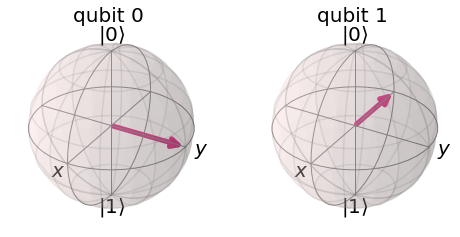

In [37]:
sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc2)
statevector = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)